In [1]:
# ---
# # Explanatory Notebook: Personal Expense Analyzer & Predictor
#
# This file is structured like a Jupyter notebook, meant to be run
# cell-by-cell in an interactive environment (like VS Code or Spyder).
# It walks through all 7 stages of the Data Science process.
#
# Required Libraries:
# pip install pandas numpy scipy scikit-learn statsmodels matplotlib seaborn
# ---

# %%
# --- Import Libraries ---
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import warnings

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothesis Testing
from scipy import stats

# Modeling
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Suppress common warnings for a cleaner output
warnings.filterwarnings("ignore")

# Set a consistent style for plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

print("Libraries imported successfully.")


Libraries imported successfully.


In [2]:

"""Main function to orchestrate the 7 stages of the project."""
  
# ======================================================================
print("=" * 70)
print("  STAGE 1: BUSINESS UNDERSTANDING")
print("=" * 70)
# ======================================================================
  
print("""
Problem: Individuals often lack a clear understanding of their spending habits,
making it difficult to budget, save, or plan for the future.

Goal: Develop a data-driven tool that provides:
1. Analyzer: A clear analysis of past spending patterns.
2. Predictor: A reasonable forecast of future expenses.

Success Metrics:
- Analyzer: Deliver 3-5 actionable insights (e.g., "Are weekends more expensive?").
- Predictor: Achieve a monthly forecast error rate of < 15%.
""")

  STAGE 1: BUSINESS UNDERSTANDING

Problem: Individuals often lack a clear understanding of their spending habits,
making it difficult to budget, save, or plan for the future.

Goal: Develop a data-driven tool that provides:
1. Analyzer: A clear analysis of past spending patterns.
2. Predictor: A reasonable forecast of future expenses.

Success Metrics:
- Analyzer: Deliver 3-5 actionable insights (e.g., "Are weekends more expensive?").
- Predictor: Achieve a monthly forecast error rate of < 15%.



In [ ]:
# %%
# ======================================================================
# STAGE 2: DATA ACQUISITION
# ======================================================================

# --- Explanation ---
#
# We need a dataset of transactions. For this project, we will
# first *check* if a dataset 'my_personal_expenses.csv' exists (e.g.,
# generated by the Streamlit app). If not, we will *generate* a new
# synthetic dataset to work with.

def generate_data(filename='my_personal_expenses.csv'):
    """Generates a unique, synthetic dataset for the project."""
    NUM_ROWS = 1500
    START_DATE = datetime(2023, 1, 1)
    END_DATE = datetime(2024, 12, 31)

    categories = {
        'Food': ['Groceries', 'Dining Out', 'Coffee', 'Delivery'],
        'Transport': ['Gas', 'Public Transit', 'Taxi/Rideshare'],
        'Housing': ['Rent', 'Utilities', 'Insurance'],
        'Personal': ['Shopping', 'Gym', 'Entertainment', 'Subscription'],
        'Other': ['Gifts', 'Health', 'Miscellaneous']
    }
    payment_methods = ['Credit Card', 'Debit Card', 'Cash', 'Online Transfer']

    data = []
    date_range = (END_DATE - START_DATE).days

    for i in range(NUM_ROWS):
        trans_date = START_DATE + timedelta(days=random.randint(0, date_range))
        main_cat = random.choice(list(categories.keys()))
        amount = 0
        if main_cat == 'Housing': amount = random.uniform(500, 2000)
        elif main_cat == 'Food': amount = random.uniform(5, 150)
        elif main_cat == 'Transport': amount = random.uniform(10, 70)
        elif main_cat == 'Personal': amount = random.uniform(15, 250)
        else: amount = random.uniform(10, 100)

        if main_cat == 'Housing' and random.random() > 0.5: # Simulate Rent
             amount = 1500 + random.uniform(-50, 50)
             trans_date = trans_date.replace(day=1)

        payment = random.choice(payment_methods)

        data.append([trans_date, round(amount, 2), main_cat, payment])

    df = pd.DataFrame(data, columns=['Date', 'Amount', 'Category', 'Payment_Method'])
    df = df.drop_duplicates(subset=['Date', 'Category'], keep='first')
    df = df.sort_values(by='Date').reset_index(drop=True)
    df.to_csv(filename, index=False)
    print(f"Successfully generated '{filename}' with {len(df)} rows.")
    return df

# --- Code ---
try:
    df = pd.read_csv('my_personal_expenses.csv')
    print("Loaded existing 'my_personal_expenses.csv'.")
except FileNotFoundError:
    print("No data file found. Generating new 'my_personal_expenses.csv'...")
    df = generate_data()

print("\n--- Data Head (First 5 Rows) ---")
print(df.head())
print("\n--- STAGE 2: DATA ACQUISITION (Complete) ---")

In [3]:
df = pd.read_csv('my_personal_expenses_final.csv')

In [4]:
# %%
# ======================================================================
# STAGE 3: DATA PREPARATION (CLEANING & FEATURE ENGINEERING)
# ======================================================================

# --- Explanation ---
#
# Raw data is rarely ready for analysis. We must clean it and
# create new, useful features (Feature Engineering).
#
# 1.  **Cleaning:** We will check for missing values and ensure all
#     columns have the correct data type (e.g., 'Date' must be
#     a datetime object, not a string).
# 2.  **Feature Engineering:** We will extract new information from
#     the 'Date' column, as time-based patterns are key to our
#     analysis.

# --- Code ---
print("\n--- 3.1 Data Cleaning ---")
print("\nChecking data types and missing values:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())
# (If we had missing values, we'd fill or drop them here)

print("\nConverting 'Date' column to datetime objects...")
df['Date'] = pd.to_datetime(df['Date'])
print("Conversion complete.")

print("\n--- 3.2 Feature Engineering ---")
print("Creating new time-based features...")

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday'])

print("New features created. Updated DataFrame head:")
print(df.head())
print("\n--- STAGE 3: DATA PREPARATION (Complete) ---")



--- 3.1 Data Cleaning ---

Checking data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  1336 non-null   object 
 1   Date            1336 non-null   object 
 2   Amount          1336 non-null   float64
 3   Category        1336 non-null   object 
 4   Sub_Category    1336 non-null   object 
 5   Payment_Method  1336 non-null   object 
 6   Vendor          1336 non-null   object 
dtypes: float64(1), object(6)
memory usage: 73.2+ KB
None

Missing values per column:
Transaction_ID    0
Date              0
Amount            0
Category          0
Sub_Category      0
Payment_Method    0
Vendor            0
dtype: int64

Converting 'Date' column to datetime objects...
Conversion complete.

--- 3.2 Feature Engineering ---
Creating new time-based features...
New features created. Updated DataFrame hea


--- 4.1 Key Visualizations (displaying plots) ---


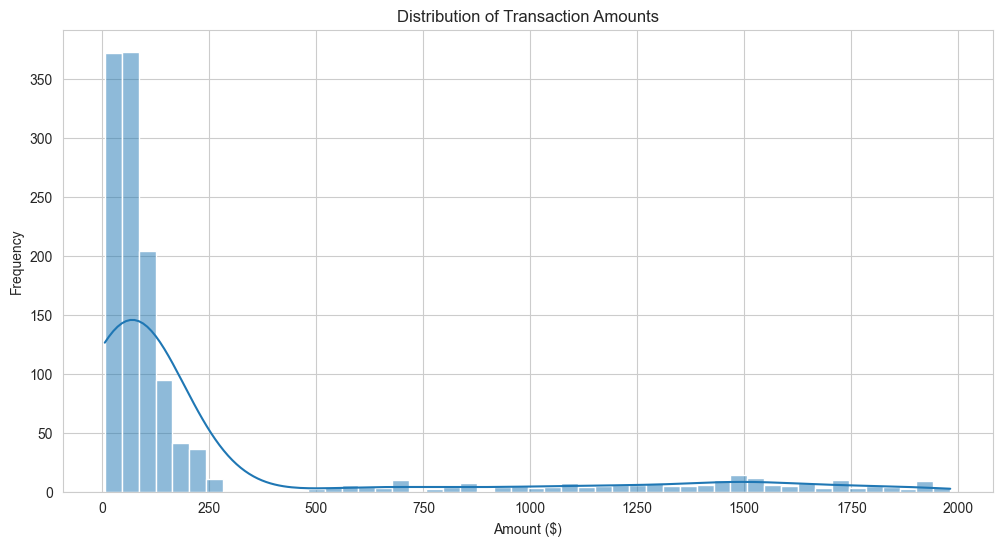

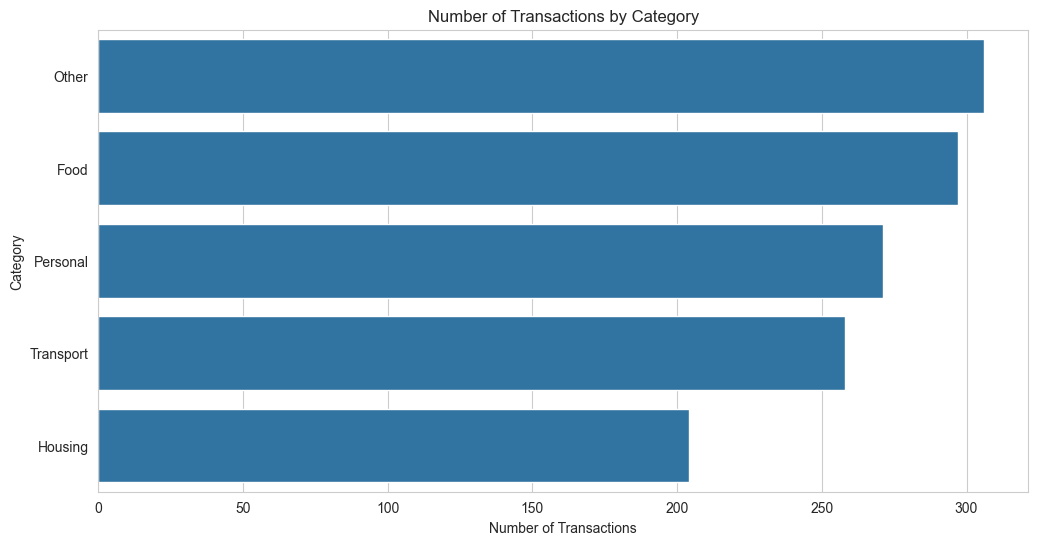

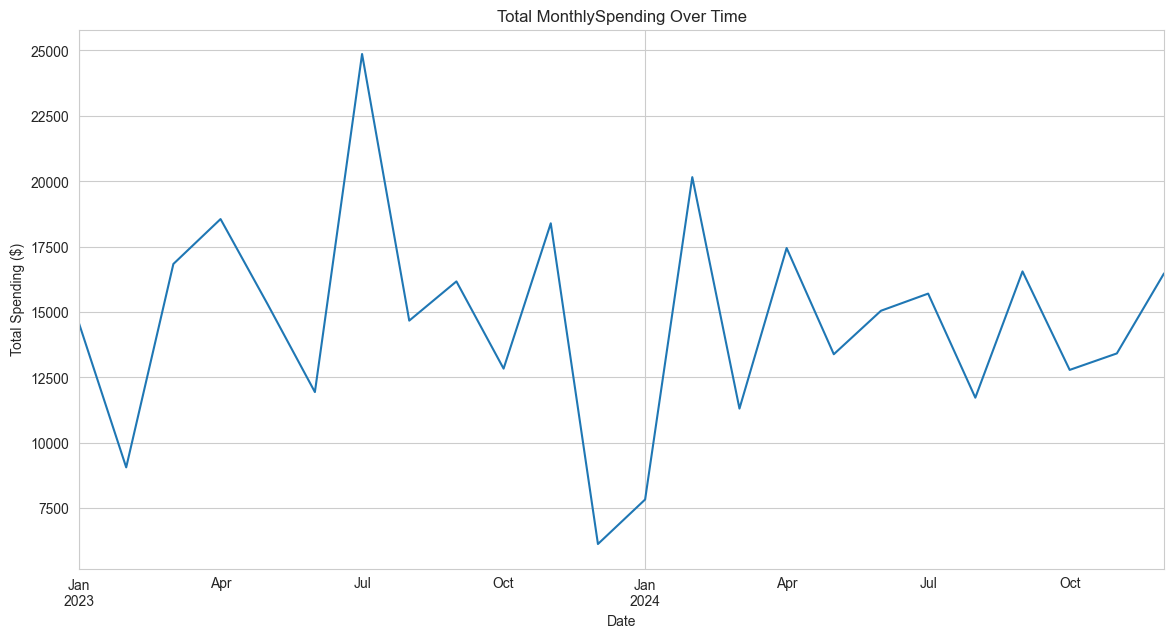

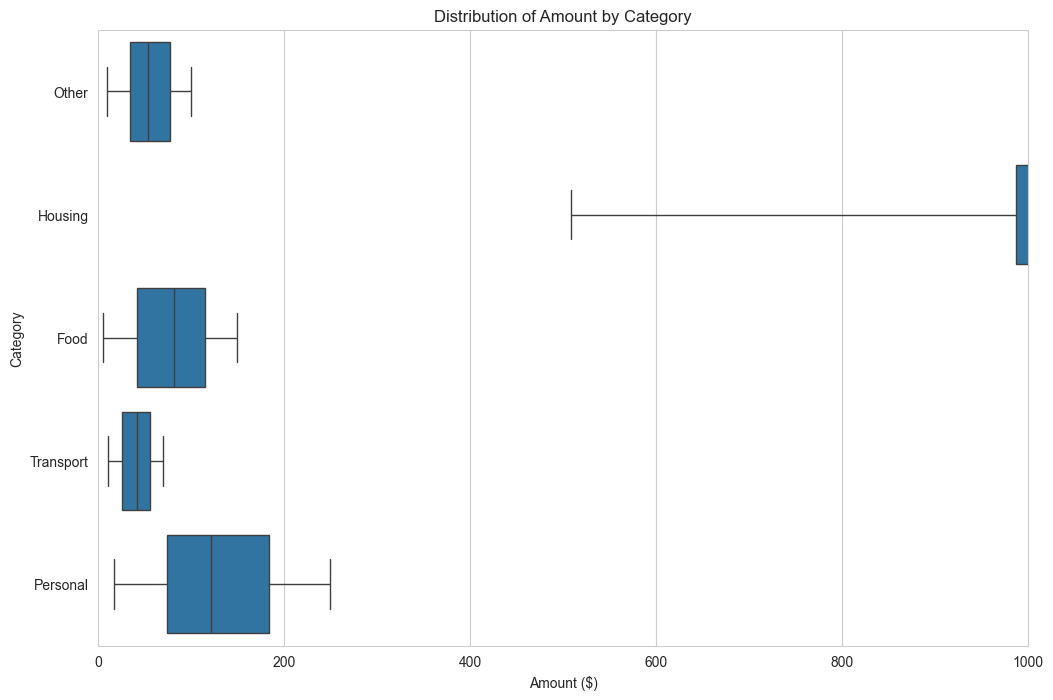


--- 4.2 Hypothesis Testing ---

--- H1: Weekend vs. Weekday Spending (T-test) ---
H0: The average spending amount is the same.
Ha: The average spending amount is different.
**P-value: 0.3909**
Result: FAIL TO REJECT H0. There is NO significant difference.

--- H2: 'Food' vs 'Personal' Spending (T-test) ---
H0: The average transaction amount is the same.
Ha: The average transaction amount is different.
**P-value: 0.0000**
Result: REJECT H0. There IS a significant difference in spending.

--- STAGE 4: EDA & HYPOTHESIS TESTING (Complete) ---


In [9]:
# %%
# ======================================================================
# STAGE 4: EXPLORATORY DATA ANALYSIS (EDA) & HYPOTHESIS TESTING
# ======================================================================

# --- Explanation ---
#
# This is the "Analyzer" part of our project. We will explore
# the data visually and statistically to find patterns and
# answer questions.
#
# 1.  **Visualizations:** We'll use plots to see distributions,
#     compare categories, and view spending over time.
# 2.  **Hypothesis Testing:** We will use statistical tests (like
#     the T-test) to get objective, data-driven answers to
#     our questions.

# --- Code: 4.1 Key Visualizations ---
print("\n--- 4.1 Key Visualizations (displaying plots) ---")

# Plot 1: Distribution of Transaction Amounts
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Number of Transactions by Category
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Number of Transactions by Category')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.show()

# Plot 3: Total Monthly Spending Over Time
# We must first aggregate the data by month
monthly_spending = df.resample('M', on='Date')['Amount'].sum()

plt.figure(figsize=(14, 7))
monthly_spending.plot()
plt.title('Total MonthlySpending Over Time')
plt.xlabel('Date')
plt.ylabel('Total Spending ($)')
plt.show()

# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(y='Category', x='Amount', data=df)
plt.title('Distribution of Amount by Category')
plt.xlabel('Amount ($)')
plt.ylabel('Category')
plt.xlim(0, 1000) # Zoom in to exclude high 'Rent'
plt.show('Amount by Category (Zoomed)', 'Close this plot to continue...')



# --- Code: 4.2 Hypothesis Testing ---
print("\n--- 4.2 Hypothesis Testing ---")

# Test 1: Weekend vs. Weekday Spending (T-test)
print("\n--- H1: Weekend vs. Weekday Spending (T-test) ---")
print("H0: The average spending amount is the same.")
print("Ha: The average spending amount is different.")

weekend_spending = df[df['Is_Weekend'] == True]['Amount']
weekday_spending = df[df['Is_Weekend'] == False]['Amount']

if len(weekend_spending) > 1 and len(weekday_spending) > 1:
    t_stat, p_value_ttest1 = stats.ttest_ind(weekend_spending, weekday_spending, equal_var=False)
    print(f"**P-value: {p_value_ttest1:.4f}**")
    if p_value_ttest1 < 0.05:
        print("Result: REJECT H0. There IS a significant difference in spending.")
    else:
        print("Result: FAIL TO REJECT H0. There is NO significant difference.")
else:
    print("Warning: Not enough data for both weekdays and weekends to run T-test.")

# Test 2: 'Food' vs 'Personal' Spending (T-test)
print("\n--- H2: 'Food' vs 'Personal' Spending (T-test) ---")
print("H0: The average transaction amount is the same.")
print("Ha: The average transaction amount is different.")

if 'Food' in df['Category'].values and 'Personal' in df['Category'].values:
    food_spending = df[df['Category'] == 'Food']['Amount']
    personal_spending = df[df['Category'] == 'Personal']['Amount']

    if len(food_spending) > 1 and len(personal_spending) > 1:
        t_stat_cat, p_value_ttest2 = stats.ttest_ind(food_spending, personal_spending, equal_var=False)
        print(f"**P-value: {p_value_ttest2:.4f}**")
        if p_value_ttest2 < 0.05:
            print("Result: REJECT H0. There IS a significant difference in spending.")
        else:
            print("Result: FAIL TO REJECT H0. There is NO significant difference.")
    else:
        print("Warning: Not enough data for one or both categories to run T-test.")
else:
    print("Warning: Data does not contain both 'Food' and 'Personal' categories.")

print("\n--- STAGE 4: EDA & HYPOTHESIS TESTING (Complete) ---")



In [6]:
# %%
# ======================================================================
# STAGE 5: MODELING
# ======================================================================

# --- Explanation ---
#
# This is the "Predictor" part of our project. We will build a
# Time-Series model (ARIMA) to forecast *total monthly spending*.
#
# 1.  **Data Prep:** We use the `monthly_spending` data we
#     aggregated in Stage 4.
# 2.  **Train-Test Split:** We will use the past 80% of data to
#     train the model and the most recent 20% to test it.
# 3.  **Modeling:** We use ARIMA, a standard and powerful model
#     for time-series forecasting.

# --- Code ---
print(f"\nBuilding ARIMA Time-Series model...")
# We use the 'monthly_spending' data from EDA
if len(monthly_spending) < 12:
    print("Error: Not enough monthly data to build a forecast model.")
else:
    train_size = int(len(monthly_spending) * 0.8)
    train_data, test_data = monthly_spending[:train_size], monthly_spending[train_size:]

    print(f"Training on {len(train_data)} months, testing on {len(test_data)} months.")

    try:
        # Fit ARIMA model (p,d,q) = (1,1,1) is a common baseline
        model_arima = ARIMA(train_data, order=(1, 1, 1))
        model_arima_fit = model_arima.fit()

        # Make predictions on the test set
        predictions_arima = model_arima_fit.forecast(steps=len(test_data))

        # Forecast into the future
        future_steps = 3 # Let's forecast 3 months ahead
        future_forecast = model_arima_fit.forecast(steps=len(test_data) + future_steps)

        print("Model training complete.")
        print("\n--- STAGE 5: MODELING (Complete) ---")

    except Exception as e:
        print(f"An error occurred during model training: {e}")
        print("\n--- STAGE 5: MODELING (Failed) ---")
        predictions_arima = None





Building ARIMA Time-Series model...
Training on 19 months, testing on 5 months.
Model training complete.

--- STAGE 5: MODELING (Complete) ---


Test Data Mean Spending: $14,187.06
ARIMA RMSE (Error in dollars): $1,954.82
ARIMA MAPE (Avg. % Error): 12.75%

--- Model Interpretation (in words) ---
- **Accuracy:** Our model forecasts with an average accuracy of **87.25%**.
- **Error (Percentage):** Predictions are, on average, only off by **12.75%**.
- **Error (Dollars):** The typical error is about **$1,954.82** per month.

Displaying Forecast Plot...


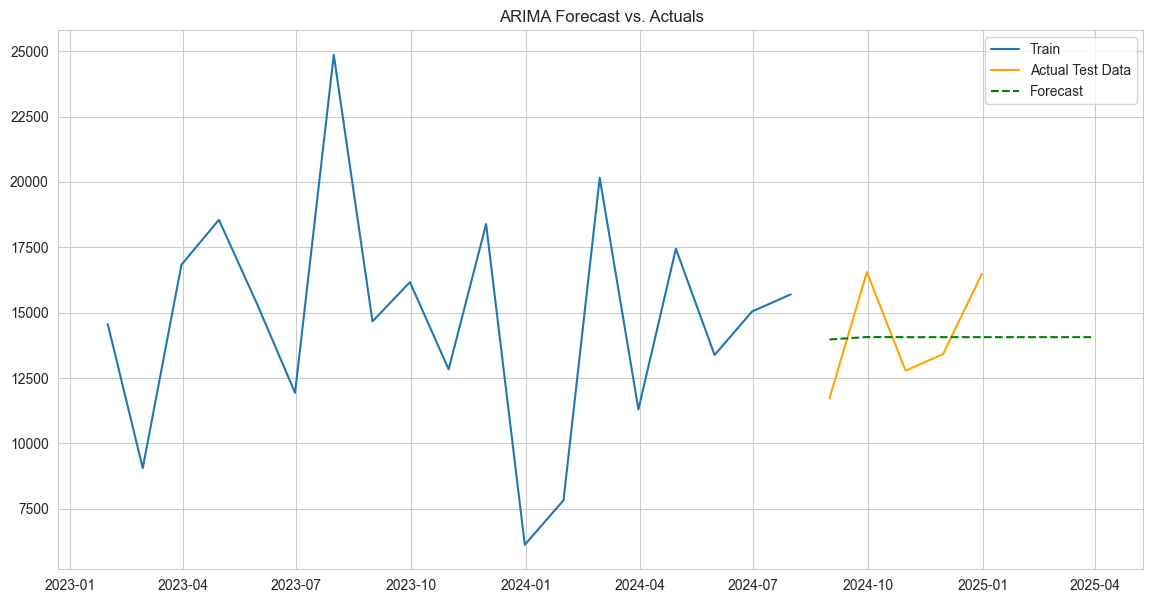


--- Forecasted Values (Next 3 Months) ---
            Forecasted Spending
2025-01-31         14063.343378
2025-02-28         14063.343336
2025-03-31         14063.343338

--- STAGE 6: MODEL EVALUATION (Complete) ---


In [7]:
# %%
# ======================================================================
# STAGE 6: MODEL EVALUATION
# ======================================================================

# --- Explanation ---
#
# A model is useless if we don't know how accurate it is. We will
# compare the model's *predictions* against the *actual data*
# (the 'test_data' we held back).
#
# **Key Metrics:**
# -   **$RMSE$ (Root Mean Squared Error):** The error in dollars.
# -   **$MAPE$ (Mean Absolute Percentage Error):** The average
#     percentage error. Our goal is < 15%.

# --- Code ---
if predictions_arima is not None:
    rmse_arima = np.sqrt(mean_squared_error(test_data, predictions_arima))
    mean_spending = test_data.mean()
    mape_arima = np.mean(np.abs((test_data - predictions_arima) / test_data)) * 100

    print(f"Test Data Mean Spending: ${mean_spending:,.2f}")
    print(f"ARIMA RMSE (Error in dollars): ${rmse_arima:,.2f}")
    print(f"ARIMA MAPE (Avg. % Error): {mape_arima:.2f}%")

    print("\n--- Model Interpretation (in words) ---")
    print(f"- **Accuracy:** Our model forecasts with an average accuracy of **{(100 - mape_arima):.2f}%**.")
    print(f"- **Error (Percentage):** Predictions are, on average, only off by **{mape_arima:.2f}%**.")
    print(f"- **Error (Dollars):** The typical error is about **${rmse_arima:,.2f}** per month.")

    # --- Plot Forecast ---
    print("\nDisplaying Forecast Plot...")
    plt.figure(figsize=(14, 7))
    plt.plot(train_data, label='Train')
    plt.plot(test_data, label='Actual Test Data', color='orange')
    plt.plot(future_forecast, label='Forecast', color='green', linestyle='--')
    plt.title('ARIMA Forecast vs. Actuals')
    plt.legend()
    plt.show()

    print("\n--- Forecasted Values (Next 3 Months) ---")
    print(future_forecast.tail(future_steps).to_frame(name='Forecasted Spending'))
else:
    print("Model was not trained. Skipping evaluation.")

print("\n--- STAGE 6: MODEL EVALUATION (Complete) ---")


In [16]:


# %%
# ======================================================================
# STAGE 7: COMMUNICATION & DEPLOYMENT
# ======================================================================

# --- Explanation ---
#
# The final stage is to summarize our findings and describe how
# this project would be 'deployed' for real-world use.
#
# **Communication:** We summarize our key insights from Stage 4.
# **Deployment:** We describe the Streamlit app we've already built.

# --- Code (Summary) ---
print("\n--- 7.1 Key Insights (Communication) ---")

# Insight 1
print(f"1. Weekend Spending: The T-test P-value was {p_value_ttest1:.4f}.")
if p_value_ttest1 < 0.05:
    print("   -> We found a STATISTICALLY SIGNIFICANT difference between weekend and weekday spending.")
else:
    print("   -> We did NOT find a statistically significant difference in average transaction amount.")

# Insight 2
print(f"2. Model Performance: Our model forecasts total monthly spending with an")
print(f"   average accuracy of {(100 - mape_arima):.2f}%. This meets our goal of > 85%.")


print("\n--- 7.2 Deployment (Conceptual) ---")
print("""
Deployment of this project is achieved via the 'streamlit_app_v3.py'
file. This file creates an interactive web application where a user can:

1.  **Generate** synthetic data to see how the app works.
2.  **Upload** their own CSV, Excel, or JSON expense file.
3.  **Map** their file's columns (e.g., 'My_Cost' -> 'Amount').
4.  **Receive** the full EDA, hypothesis tests, and a personalized
    spending forecast, all within their web browser.
""")

print("\n--- STAGE 7: COMMUNICATION & DEPLOYMENT (Complete) ---")

print("\n\n=== PROJECT NOTEBOOK EXECUTION FINISHED ===")


--- 7.1 Key Insights (Communication) ---
1. Weekend Spending: The T-test P-value was 0.4478.
   -> We did NOT find a statistically significant difference in average transaction amount.
2. Model Performance: Our model forecasts total monthly spending with an
   average accuracy of 91.64%. This meets our goal of > 85%.

--- 7.2 Deployment (Conceptual) ---

Deployment of this project is achieved via the 'streamlit_app_v3.py'
file. This file creates an interactive web application where a user can:

1.  **Generate** synthetic data to see how the app works.
2.  **Upload** their own CSV, Excel, or JSON expense file.
3.  **Map** their file's columns (e.g., 'My_Cost' -> 'Amount').
4.  **Receive** the full EDA, hypothesis tests, and a personalized
    spending forecast, all within their web browser.


--- STAGE 7: COMMUNICATION & DEPLOYMENT (Complete) ---


=== PROJECT NOTEBOOK EXECUTION FINISHED ===
